In [1]:
# import all the important libraries
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
import matplotlib.pyplot as plt

In [2]:
# loading a dataset
(X_train , y_train) , (X_test , y_test ) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [8]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

4

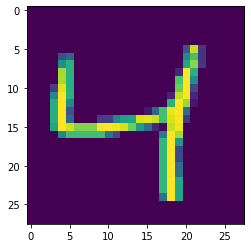

In [12]:
# visualising the data
class_number = 2
plt.imshow(X_train.reshape(60000,28,28)[class_number])
y_train[class_number]

In [14]:
# Normalising the data
X_train, X_test = X_train/255.0 , X_test/255.0

In [15]:
# Model building

model = Sequential()

# conv layer 1
model.add(Conv2D(36, (3,3), activation='relu', kernel_initializer='he_uniform',))
model.add(MaxPool2D())

# conv layer 2
model.add(Conv2D(72, (3,3), activation='relu', kernel_initializer='he_uniform',))
model.add(MaxPool2D())

# conv layer 3
model.add(Conv2D(144, (3,3), activation='relu', kernel_initializer='he_uniform',))
model.add(MaxPool2D())

model.add(Flatten())

# fully connected layer

# hidden layer 1
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.2))

# hidden layer 2
model.add(Dense(64, activation='sigmoid'))
model.add(Dropout(0.2))

# hidden layer 3
model.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(10, activation='softmax'))

In [16]:
# compile
model.compile(optimizer='adam', loss = tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [ ]:
# fit
model.fit(X_train , y_train , epochs=50, batch_size=32)

Epoch 1/50
 125/1875 [=>............................] - ETA: 1:06 - loss: 0.2719 - accuracy: 0.9255